In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5546 (42.9254, 45.1814) (43.3171, 45.1999)  1.8828 (Jnode 202)\n',
 't_n104        30.1581 (26.8982, 32.7135) (27.1354, 32.8551)  5.7196 (Jnode 201)\n',
 't_n105        28.9826 (25.8286, 31.5063) (25.9938, 31.6027)  5.6089 (Jnode 200)\n',
 't_n106        26.3052 (23.4067, 28.8069) (23.5431, 28.9299)  5.3868 (Jnode 199)\n',
 't_n107        25.4701 (22.6611, 27.9398) (22.7779, 28.0295)  5.2516 (Jnode 198)\n',
 't_n108        23.9283 (21.3078, 26.3616) (21.3949, 26.4373)  5.0424 (Jnode 197)\n',
 't_n109        12.5050 (11.3196, 14.2694) (11.2135, 14.1058)  2.8923 (Jnode 196)\n',
 't_n110        12.3790 (11.2078, 14.1268) (11.1324, 14.0025)  2.8701 (Jnode 195)\n',
 't_n111        11.9528 (10.8351, 13.6498) (10.7527, 13.5174)  2.7646 (Jnode 194)\n',
 't_n112        11.4012 (10.3414, 13.0243) (10.2404, 12.8664)  2.6260 (Jnode 193)\n',
 't_n113        10.8777 ( 9.8849, 12.4293) ( 9.7679, 12.2578)  2.4899 (Jnode 192)\n',
 't_n114         7.3287 ( 6.4805,  8.4678) ( 6.4213,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.5546,
 30.1581,
 28.9826,
 26.3052,
 25.4701,
 23.9283,
 12.505,
 12.379,
 11.9528,
 11.4012,
 10.8777,
 7.3287,
 4.3553,
 2.5268,
 2.2731,
 8.3574,
 7.0107,
 11.4437,
 7.0719,
 10.9458,
 8.6945,
 7.0546,
 6.1497,
 10.673,
 9.968,
 3.0239,
 11.7952,
 10.5802,
 8.2347,
 6.5866,
 7.3122,
 6.561,
 5.4072,
 5.6081,
 22.2343,
 18.2408,
 24.267,
 22.2511,
 20.589,
 17.2108,
 9.6184,
 16.8592,
 14.6135,
 12.9473,
 10.8827,
 20.3082,
 18.6914,
 5.6976,
 2.7066,
 27.0172,
 25.3474,
 22.7028,
 22.1959,
 23.8724,
 16.3229,
 20.0958,
 15.8317,
 29.3302,
 27.5976,
 25.1551,
 23.5221,
 20.2494,
 13.8752,
 17.8116,
 24.4791,
 9.0246,
 24.6199,
 36.6237,
 35.4465,
 34.3205,
 32.6559,
 30.109,
 28.6434,
 27.3395,
 25.8643,
 22.9231,
 19.7614,
 16.4139,
 23.1363,
 21.7161,
 17.3795,
 19.1561,
 25.6075,
 23.4624,
 21.3603,
 18.3949,
 12.7802,
 23.844,
 21.3895,
 18.5874,
 28.3354,
 26.7096,
 24.6723,
 21.5912,
 15.3144,
 24.83,
 17.6726,
 13.9343,
 5.6274,
 35.7371,
 31.1227]

In [7]:
lower_ci_iqtree

[5.1814,
 2.7135,
 1.5063,
 8.8069,
 7.9398,
 6.3616,
 4.2694,
 4.1268,
 3.6498,
 3.0243,
 0.8849,
 0.4805,
 0.2083,
 0.3694,
 0.5324,
 0.2754,
 0.9329,
 3.073,
 0.8154,
 0.9057,
 0.6117,
 0.9497,
 0.7301,
 0.5217,
 0.8335,
 0.0887,
 3.4749,
 0.4489,
 0.9671,
 0.3326,
 0.2224,
 0.5183,
 0.4657,
 0.1793,
 4.6865,
 1.0762,
 6.7139,
 4.7269,
 3.1327,
 9.962,
 0.6,
 9.6329,
 7.4043,
 5.6767,
 0.3284,
 2.9205,
 1.4374,
 0.0073,
 0.3233,
 9.6125,
 8.0575,
 5.7585,
 5.3291,
 6.7397,
 0.2631,
 3.3712,
 9.5293,
 1.8998,
 0.2628,
 8.0021,
 6.4926,
 3.467,
 7.8624,
 1.1699,
 7.487,
 0.2108,
 7.845,
 8.4334,
 6.9741,
 5.6238,
 3.7115,
 1.3709,
 0.0835,
 8.916,
 7.603,
 5.0486,
 2.3141,
 9.3531,
 5.191,
 3.8995,
 0.1321,
 1.6345,
 7.3638,
 5.4413,
 3.547,
 0.8778,
 5.881,
 5.774,
 3.608,
 1.1657,
 9.8326,
 8.4785,
 6.8254,
 4.3372,
 9.111,
 7.0691,
 1.2469,
 7.5504,
 0.3653,
 7.522,
 3.3635]

In [8]:
upper_ci_iqtree

[43.3171,
 27.1354,
 25.9938,
 23.5431,
 22.7779,
 21.3949,
 11.2135,
 11.1324,
 10.7527,
 10.2404,
 12.4293,
 8.4678,
 4.761,
 2.7447,
 3.0212,
 9.7053,
 8.2308,
 10.2543,
 8.7015,
 12.5198,
 10.0656,
 8.3086,
 7.7578,
 12.3139,
 11.5539,
 4.3906,
 10.607,
 12.1213,
 9.637,
 7.8951,
 8.3084,
 7.5487,
 6.3926,
 7.4894,
 19.6902,
 15.2325,
 21.6216,
 19.6858,
 18.0325,
 14.3409,
 12.7737,
 13.8743,
 11.84,
 10.2451,
 13.4803,
 17.5906,
 15.8929,
 8.2211,
 4.3368,
 24.1089,
 22.451,
 19.5961,
 19.0029,
 20.6842,
 11.797,
 16.5594,
 12.062,
 26.3863,
 24.6192,
 22.0409,
 20.3244,
 17.0407,
 10.4551,
 14.3814,
 21.118,
 13.3138,
 21.0731,
 35.1652,
 34.264,
 33.3934,
 32.26,
 28.799,
 27.082,
 25.6239,
 23.9155,
 20.5438,
 16.9749,
 13.1013,
 20.8882,
 19.3828,
 14.3064,
 16.4519,
 23.708,
 21.3058,
 19.0143,
 15.8536,
 10.0429,
 21.6897,
 19.0054,
 15.944,
 26.6304,
 24.7418,
 22.2019,
 18.5303,
 11.2034,
 22.1501,
 14.7011,
 10.8876,
 8.2387,
 34.2559,
 28.2643]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

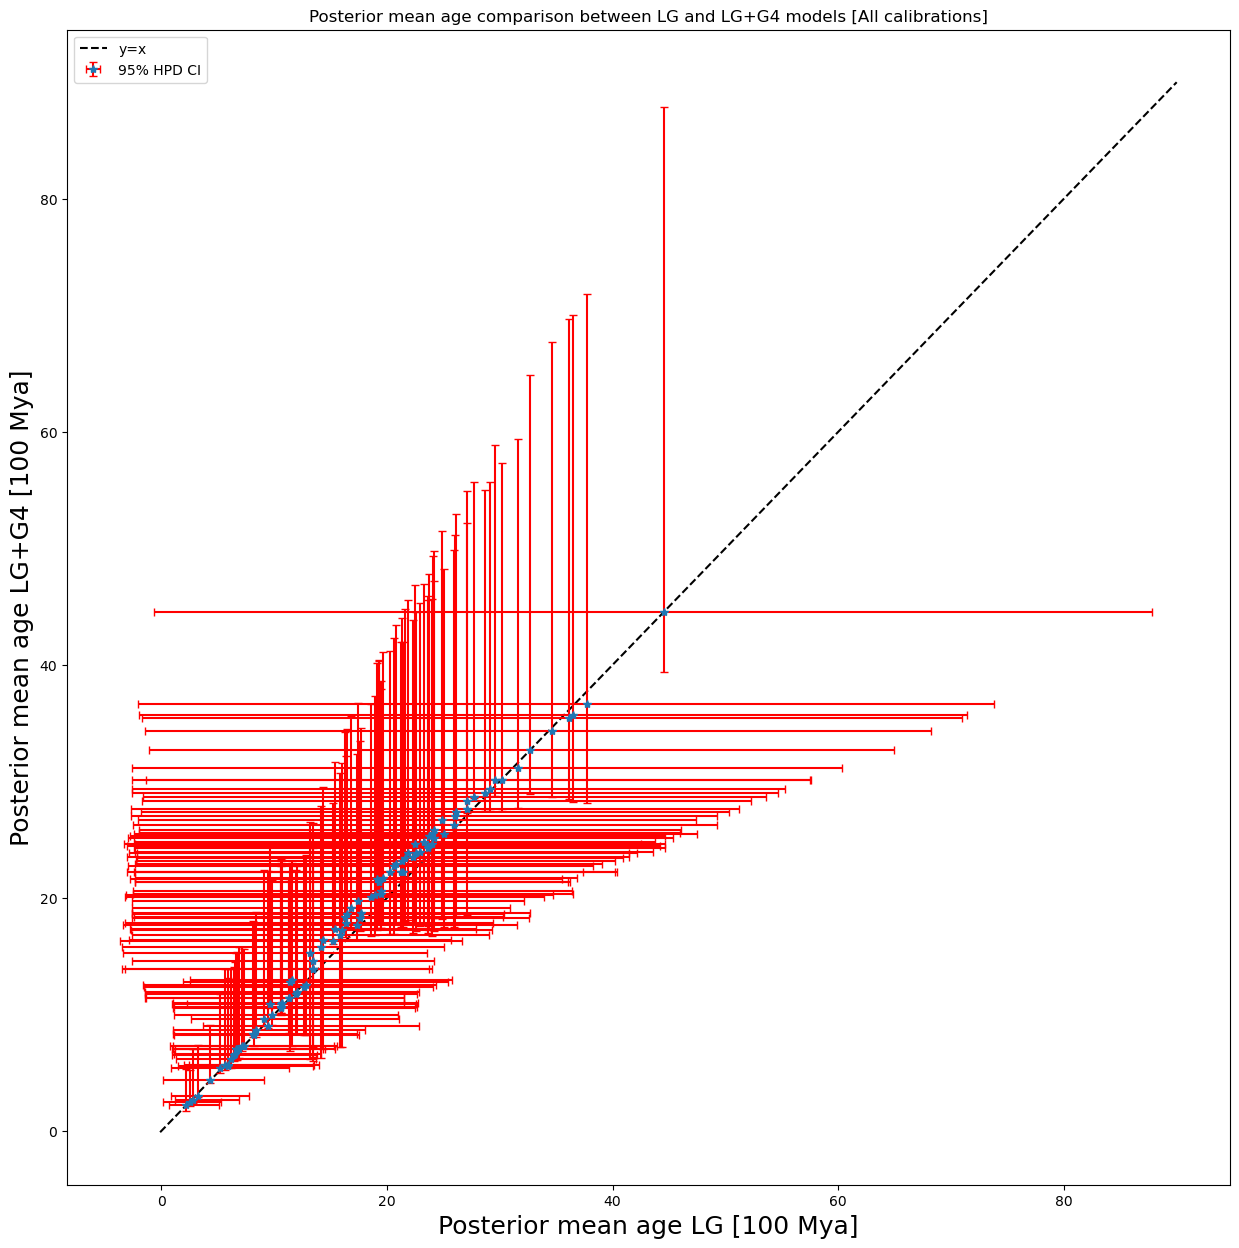

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_all.png')

In [11]:
posterior_mean_baseml

[44.5419,
 30.1968,
 28.7294,
 25.9738,
 25.0315,
 22.9717,
 12.8445,
 12.6671,
 12.0081,
 11.3271,
 10.6247,
 7.1656,
 4.3586,
 2.5319,
 2.2311,
 8.0947,
 6.6379,
 11.3156,
 6.9303,
 10.7008,
 8.4111,
 6.6862,
 6.1684,
 10.6302,
 9.8206,
 3.2392,
 11.9333,
 10.5796,
 8.1907,
 6.495,
 7.3147,
 6.4245,
 5.1869,
 5.9575,
 21.267,
 17.5896,
 23.6037,
 21.3943,
 19.4631,
 16.0143,
 9.0777,
 15.8382,
 13.4635,
 11.6266,
 9.5965,
 19.4896,
 17.6895,
 5.8954,
 2.7775,
 26.0222,
 23.7456,
 20.6398,
 20.2357,
 22.5526,
 15.2451,
 18.5812,
 14.1638,
 29.148,
 27.1185,
 24.2179,
 22.2782,
 18.9631,
 13.422,
 16.3417,
 23.6828,
 9.4609,
 24.0399,
 37.7588,
 36.1424,
 34.6238,
 32.6819,
 29.5544,
 27.7356,
 26.1239,
 24.1326,
 20.7755,
 17.4522,
 14.3625,
 21.3161,
 19.6761,
 15.3737,
 16.7852,
 24.0488,
 21.5777,
 19.2812,
 16.2978,
 11.4443,
 21.8303,
 19.2901,
 16.4951,
 27.134,
 24.8478,
 22.5103,
 19.1499,
 13.2268,
 23.2594,
 17.3733,
 13.4562,
 5.6095,
 36.5244,
 31.6025]

In [12]:
posterior_mean_iqtree

[44.5546,
 30.1581,
 28.9826,
 26.3052,
 25.4701,
 23.9283,
 12.505,
 12.379,
 11.9528,
 11.4012,
 10.8777,
 7.3287,
 4.3553,
 2.5268,
 2.2731,
 8.3574,
 7.0107,
 11.4437,
 7.0719,
 10.9458,
 8.6945,
 7.0546,
 6.1497,
 10.673,
 9.968,
 3.0239,
 11.7952,
 10.5802,
 8.2347,
 6.5866,
 7.3122,
 6.561,
 5.4072,
 5.6081,
 22.2343,
 18.2408,
 24.267,
 22.2511,
 20.589,
 17.2108,
 9.6184,
 16.8592,
 14.6135,
 12.9473,
 10.8827,
 20.3082,
 18.6914,
 5.6976,
 2.7066,
 27.0172,
 25.3474,
 22.7028,
 22.1959,
 23.8724,
 16.3229,
 20.0958,
 15.8317,
 29.3302,
 27.5976,
 25.1551,
 23.5221,
 20.2494,
 13.8752,
 17.8116,
 24.4791,
 9.0246,
 24.6199,
 36.6237,
 35.4465,
 34.3205,
 32.6559,
 30.109,
 28.6434,
 27.3395,
 25.8643,
 22.9231,
 19.7614,
 16.4139,
 23.1363,
 21.7161,
 17.3795,
 19.1561,
 25.6075,
 23.4624,
 21.3603,
 18.3949,
 12.7802,
 23.844,
 21.3895,
 18.5874,
 28.3354,
 26.7096,
 24.6723,
 21.5912,
 15.3144,
 24.83,
 17.6726,
 13.9343,
 5.6274,
 35.7371,
 31.1227]

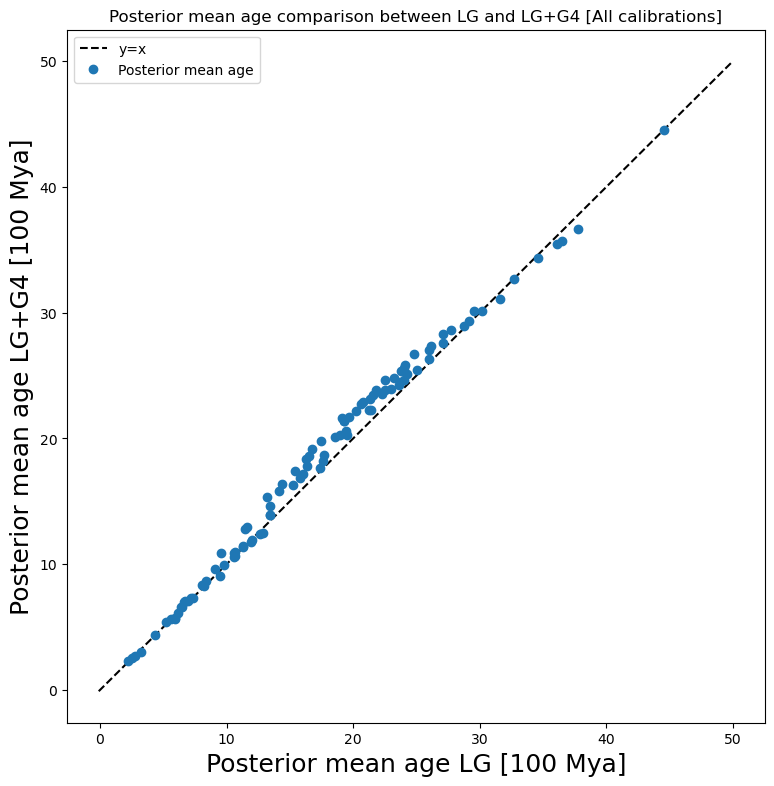

In [17]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_all_scatter.png')

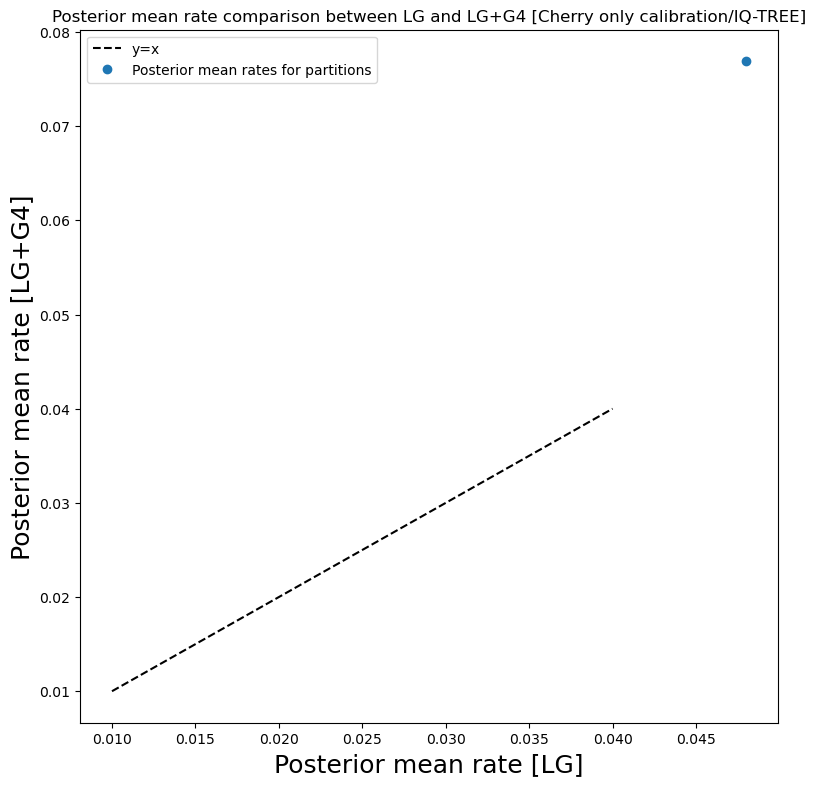

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')